<a href="https://colab.research.google.com/github/lala991204/DL-self-study/blob/master/tensorflow/3_10_custom_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
polimport numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train / x_train.max()
x_test = x_test / x_test.max()

model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28,28)),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax'),
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])


지금까지 모델 훈련 시에 fit() 메소드를 이용하였다. 이를 이용하면 전체 배치에 대해 훈련을 진행한 후 1 epoch가 끝나면 전체 훈련 loss, metrics를 보여준다.

한편, train_on_batch()를 활용하면 배치별로 구분해서 훈련 진행 가능하다.

In [ ]:
# 배치 생성 함수
def get_batches(x, y, batch_size=32):
    for i in range(int(x.shape[0] // batch_size)):        # batch_size만큼 묶음으로 loop 돈다.
        x_batch = x[i * batch_size: (i+1) * batch_size]
        y_batch = y[i * batch_size: (i+1) * batch_size]
        # for 루프가 실행될 때 yield를 만나기 전까지 실행하고 해당 loop에 대한 결과 반환.
        yield(np.asarray(x_batch), np.asarray(y_batch)) 

# 1개의 배치 로드(이때, batch_size=32이므로 32개의 쌍이 반환됨.)
x, y = next(get_batches(x_train, y_train))    # 제너레이터(yield로 반환하는 함수가 됨)에서 값 반환받기 위해서는!
x.shape, y.shape

((32, 28, 28), (32,))

epoch:1, batch:50, batch_loss: 0.3774,             batch_accuracy: 0.8828, avg_loss: 0.9379
epoch:1, batch:100, batch_loss: 0.3840,             batch_accuracy: 0.8984, avg_loss: 0.6547
epoch:1, batch:150, batch_loss: 0.2649,             batch_accuracy: 0.9375, avg_loss: 0.5429
epoch:1, batch:200, batch_loss: 0.2394,             batch_accuracy: 0.9297, avg_loss: 0.4675
epoch:1, batch:250, batch_loss: 0.1976,             batch_accuracy: 0.9219, avg_loss: 0.4207
epoch:1, batch:300, batch_loss: 0.2346,             batch_accuracy: 0.9375, avg_loss: 0.3846
epoch:1, batch:350, batch_loss: 0.1097,             batch_accuracy: 0.9688, avg_loss: 0.3578
epoch:1, batch:400, batch_loss: 0.1001,             batch_accuracy: 0.9844, avg_loss: 0.3410
epoch:1, batch:450, batch_loss: 0.1239,             batch_accuracy: 0.9609, avg_loss: 0.3200


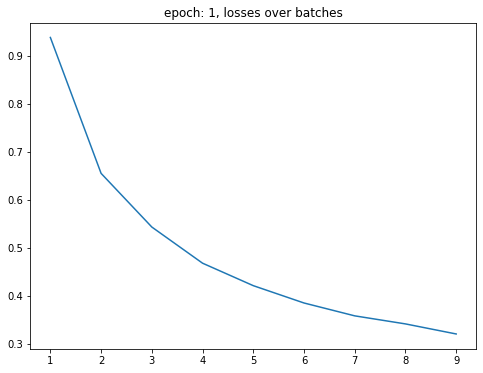

313/313 [==============================] - 1s 2ms/step - loss: 0.1417 - accuracy: 0.9578
------------------------------
epoch: 1, val_loss: 0.1417, val_accuracy: 0.9578

epoch:2, batch:50, batch_loss: 0.0739,             batch_accuracy: 0.9844, avg_loss: 0.1280
epoch:2, batch:100, batch_loss: 0.2330,             batch_accuracy: 0.9297, avg_loss: 0.1403
epoch:2, batch:150, batch_loss: 0.1581,             batch_accuracy: 0.9531, avg_loss: 0.1354
epoch:2, batch:200, batch_loss: 0.1759,             batch_accuracy: 0.9453, avg_loss: 0.1318
epoch:2, batch:250, batch_loss: 0.1150,             batch_accuracy: 0.9609, avg_loss: 0.1307
epoch:2, batch:300, batch_loss: 0.1504,             batch_accuracy: 0.9375, avg_loss: 0.1294
epoch:2, batch:350, batch_loss: 0.0587,             batch_accuracy: 0.9844, avg_loss: 0.1272
epoch:2, batch:400, batch_loss: 0.0880,             batch_accuracy: 0.9688, avg_loss: 0.1294
epoch:2, batch:450, batch_loss: 0.0821,             batch_accuracy: 0.9609, avg_loss: 0

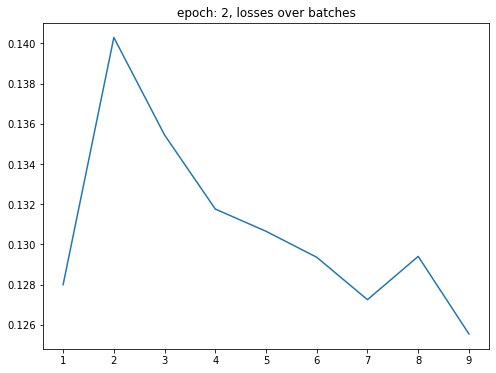

313/313 [==============================] - 1s 2ms/step - loss: 0.1108 - accuracy: 0.9645
------------------------------
epoch: 2, val_loss: 0.1108, val_accuracy: 0.9645

epoch:3, batch:50, batch_loss: 0.0354,             batch_accuracy: 0.9844, avg_loss: 0.0811
epoch:3, batch:100, batch_loss: 0.1393,             batch_accuracy: 0.9609, avg_loss: 0.0884
epoch:3, batch:150, batch_loss: 0.1143,             batch_accuracy: 0.9844, avg_loss: 0.0853
epoch:3, batch:200, batch_loss: 0.1310,             batch_accuracy: 0.9688, avg_loss: 0.0845
epoch:3, batch:250, batch_loss: 0.0622,             batch_accuracy: 0.9844, avg_loss: 0.0836
epoch:3, batch:300, batch_loss: 0.1015,             batch_accuracy: 0.9609, avg_loss: 0.0843
epoch:3, batch:350, batch_loss: 0.0473,             batch_accuracy: 0.9922, avg_loss: 0.0837
epoch:3, batch:400, batch_loss: 0.0619,             batch_accuracy: 0.9766, avg_loss: 0.0842
epoch:3, batch:450, batch_loss: 0.0434,             batch_accuracy: 0.9844, avg_loss: 0

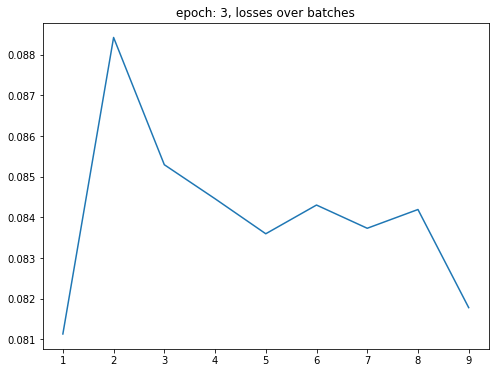

313/313 [==============================] - 1s 2ms/step - loss: 0.1083 - accuracy: 0.9664
------------------------------
epoch: 3, val_loss: 0.1083, val_accuracy: 0.9664



In [ ]:
MONITOR_STEP = 50

for epoch in range(1,4):
    batch = 1
    total_loss = 0
    losses = []
    for x, y in get_batches(x_train, y_train, batch_size=128):
        # 배치별 훈련
        loss, acc = model.train_on_batch(x, y)
        total_loss += loss

        # 출력
        if batch % MONITOR_STEP == 0:
            losses.append(total_loss / batch)        # 평균 손실 = 배치별 손실 누적 합/전체 배치 개수
            print(f'epoch:{epoch}, batch:{batch}, batch_loss: {loss:.4f}, \
            batch_accuracy: {acc:.4f}, avg_loss: {total_loss / batch:.4f}')
        batch += 1

    # Loss 시각화(하나의 epoch의 훈련이 끝난 후)
    plt.figure(figsize=(8,6))
    plt.plot(np.arange(1, batch // MONITOR_STEP + 1), losses)
    plt.title(f'epoch: {epoch}, losses over batches')
    plt.show()

    # 결과 출력
    loss, acc = model.evaluate(x_test, y_test)
    print('---' * 10)
    print(f'epoch: {epoch}, val_loss: {loss:.4f}, val_accuracy: {acc:.4f}')
    print()

fit()를 활용해 모델 훈련 시에는 배치별 훈련을 제어하거나 매 epoch가 끝날 때마다 시각화가 어렵다는 단점이 존재하는 반면, train_on_batch()를 활용하면 배치 훈련이 완료된 뒤 다양한 로직을 직접 구현해 줌으로써 훈련 모니터링 가능하다.